# Hopfield 🫠

https://towardsdatascience.com/hopfield-networks-neural-memory-machines-4c94be821073

### Libraries

In [9]:
import utilities as ff
from matplotlib import pyplot as plt
import numpy as np

### Hopfield class

In [10]:
class Hopfield_Net: #network class
    #init ialize network variables and memory
    def __init__(self,input):
        
        #patterns for network training / retrieval
        self.memory = np.array(input)
        #single vs. multiple memories
        if   self.memory.size > 1:
             self.n = self.memory.shape[1] 
        else:
             self.n = len(self.memory)
        #network construction
        self.state = np.random.randint(-2,2,(self.n,1)) #state vector
        self.weights = np.zeros((self.n,self.n)) #weights vector
        self.energies = [] #container for tracking of energy
        
       
    def network_learning(self): #learn the pattern / patterns
        self.weights = (1 / self.memory.shape[0]) * self.memory.T @ self.memory #hebbian learning
        np.fill_diagonal(self.weights, 0)


    def update_network_state(self,n_update): #update network
        for neuron in range(n_update): #update n neurons randomly
            self.rand_index = np.random.randint(0,self.n) #pick a random neuron in the state vector
            #Compute activation for randomly indexed neuron
            self.index_activation = np.dot(self.weights[self.rand_index,:],
                                           self.state) 
            #threshold function for binary state change
            if self.index_activation < 0: 
                self.state[self.rand_index] = -1
            else:
                self.state[self.rand_index] =  1

            
    def compute_energy(self): #compute energy
        self.energy = -0.5*np.dot(np.dot(self.state.T,self.weights),self.state)
        self.energies.append(self.energy)

### Dataset

### Training and testing

### MNIST's game

In [11]:
#for MNIST fetch
import requests, gzip, os, hashlib
import pygame

#Fetch MNIST dataset from the ~SOURCE~
def fetch_MNIST(url):
  fp = os.path.join(hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  
  return np.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()

def MNIST_Hopfield(): 
    #test out the Hopfield_Network object on some MNIST data
    #fetch MNIST dataset for some random memory downloads
    
    X = fetch_MNIST(
        "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
        )[0x10:].reshape((-1,784))
    
    #convert to binary
    X_binary = np.where(X>20, 1,-1)

    #Snag a memory from computer brain
    memories_list = np.array([X_binary[np.random.randint(len(X))]])
    
    #initialize Hopfield object
    H_Net = Hopfield_Net(memories_list)
    H_Net.network_learning()


    #Draw it all out, updating board each update iteration
    cellsize = 20
   
    pygame.init() #initialize pygame
    #set dimensions of board and cellsize -  28 X 28  ~ special display surface
    surface = pygame.display.set_mode((28*cellsize,28*cellsize)) 
    pygame.display.set_caption("   ")
    

    #kill pygame if user exits window
    Running = True
    #main animation loop
    while Running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                Running = False
               
                #plot weights matrix
                plt.figure("weights", figsize=(10,7))
                plt.imshow(H_Net.weights,cmap='RdPu') #
                plt.xlabel("Each row/column represents a neuron, each square a connection")
        
                plt.title(" 4096 Neurons - 16,777,216 unique connections",fontsize=15)
                plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

                #plot energies
                plt.figure("Energy",figsize=(10,7))
                x = np.arange(len(H_Net.energies))
                plt.scatter(x,np.array(H_Net.energies),s=1,color='red')
                plt.xlabel("Generation")
                plt.ylabel("Energy")
                plt.title("Network Energy over Successive Generations",fontsize=15)
                plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

                #quit pygame
                pygame.quit()
    
                
        cells = H_Net.state.reshape(28,28).T
       
        #fills surface with color
        surface.fill((211,211,211)) 
       
        #loop through network state array and update colors for each cell
        for r, c in np.ndindex(cells.shape): #iterates through all cells in cells matrix
            if cells[r,c] == -1:
                col = (135,206,250)
            
            elif cells[r,c] == 1:
                col = (0,0,128)
            
            else: 
                col = (255,140,0)
            pygame.draw.rect(surface, col, (r*cellsize, c*cellsize, \
                                              cellsize, cellsize)) #draw new cell_                 
        
        #update network state
        H_Net.update_network_state(16)
        H_Net.compute_energy()
        pygame.display.update() #updates display from new .draw in update function
        pygame.time.wait(50)

error: display Surface quit

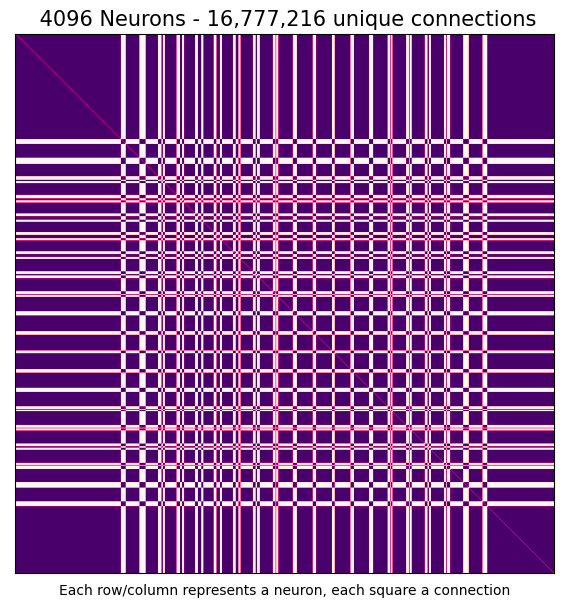

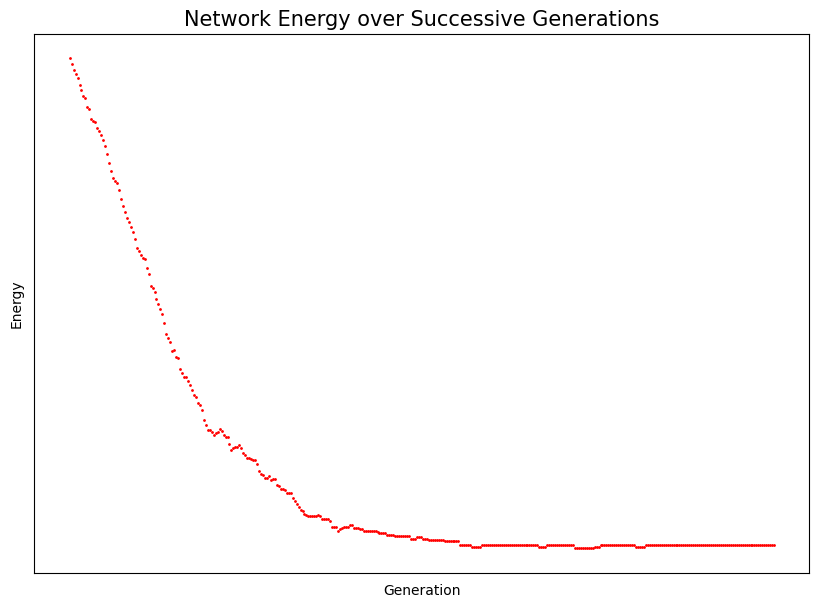

In [15]:
MNIST_Hopfield()
plt.show()